In [1]:
# ==============================================
# CONVERSION ANALYTICS PROJECT
# Using Online Shoppers Intention Dataset
# ==============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [3]:
# Load dataset
df = pd.read_csv("online_shoppers_intention.csv")

print("Dataset Shape:", df.shape)
print(df.head())
print(df.info())


Dataset Shape: (12330, 18)
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10      

In [4]:
# Rename target column
df.rename(columns={'Revenue': 'Converted'}, inplace=True)

# Overall conversion rate
conversion_rate = df['Converted'].mean() * 100
print(f"\nOverall Conversion Rate: {conversion_rate:.2f}%")

# Conversion by Visitor Type
print("\nConversion by Visitor Type:")
print(df.groupby('VisitorType')['Converted'].mean() * 100)





Overall Conversion Rate: 15.47%

Conversion by Visitor Type:
VisitorType
New_Visitor          24.911452
Other                18.823529
Returning_Visitor    13.932329
Name: Converted, dtype: float64


In [5]:
# Total Pages
df['Total_Pages'] = (
    df['Administrative'] +
    df['Informational'] +
    df['ProductRelated']
)

# Engagement Score
df['Engagement_Score'] = (
    0.4 * df['Total_Pages'] +
    0.4 * df['PageValues'] +
    0.2 * (1 - df['BounceRates'])
)

# Exit-Bounce Difference
df['Exit_Bounce_Diff'] = df['ExitRates'] - df['BounceRates']


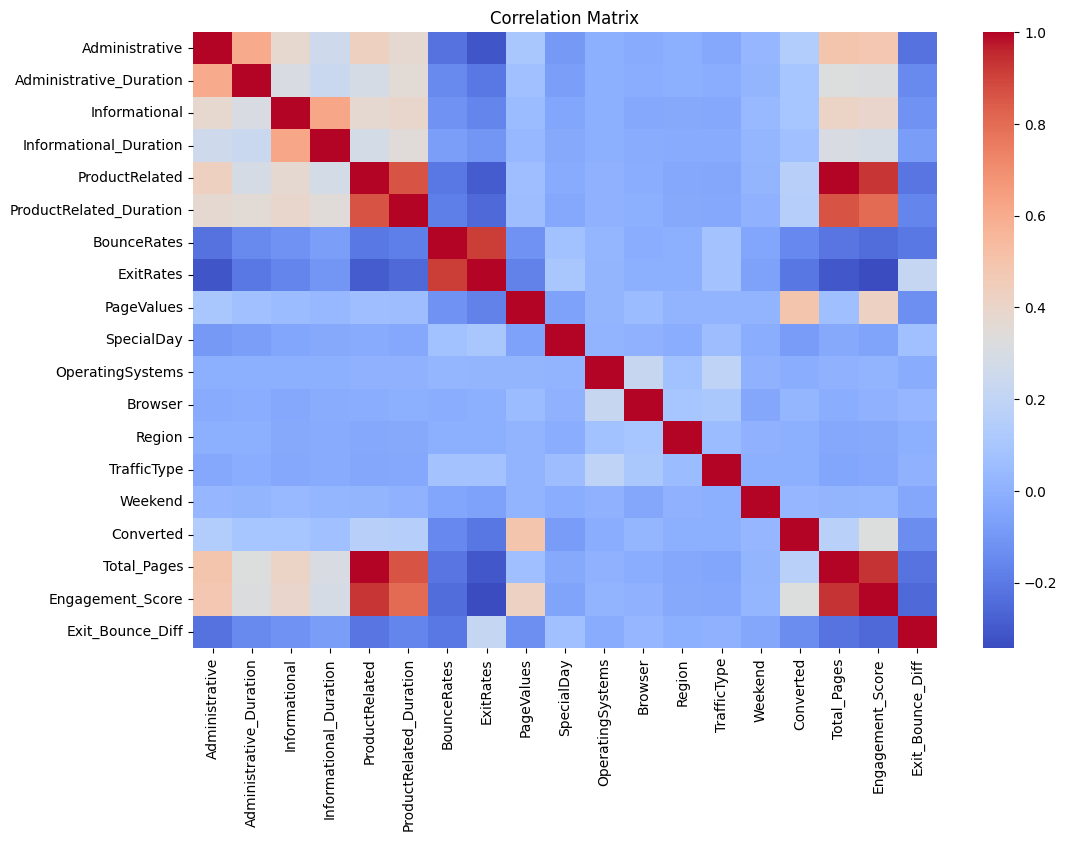

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [7]:
# Convert categorical columns
df = pd.get_dummies(df, drop_first=True)

# Define features & target
X = df.drop(columns=['Converted'])
y = df['Converted']

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [8]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nModel Performance:")
print(classification_report(y_test, y_pred))

print("ROC AUC Score:",
      roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))



Model Performance:
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      2055
        True       0.76      0.56      0.64       411

    accuracy                           0.90      2466
   macro avg       0.84      0.76      0.79      2466
weighted avg       0.89      0.90      0.89      2466

ROC AUC Score: 0.9197980120884911


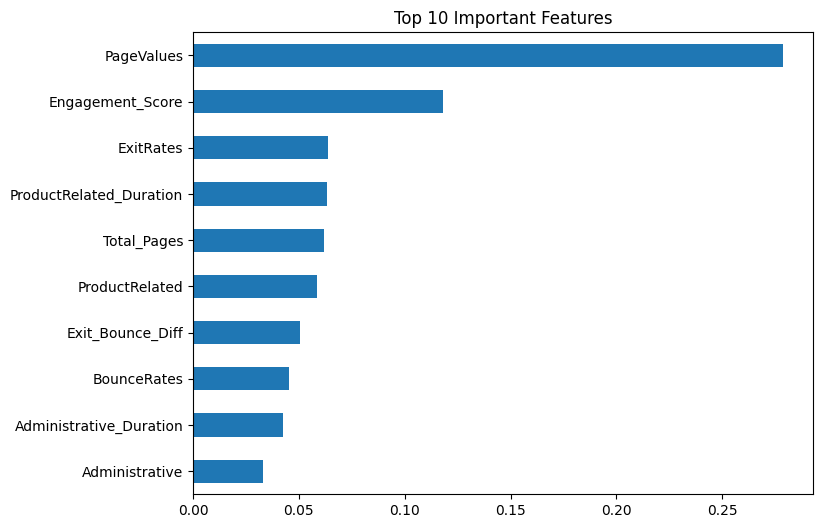

In [9]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().tail(10).plot(kind='barh', figsize=(8,6))
plt.title("Top 10 Important Features")
plt.show()


In [10]:
df['Conversion_Probability'] = model.predict_proba(X_scaled)[:,1]

print("\nTop 10 High Probability Customers:")
print(df[['Conversion_Probability']].sort_values(
    by='Conversion_Probability', ascending=False).head(10))



Top 10 High Probability Customers:
       Conversion_Probability
4006                    1.000
3899                    1.000
8616                    1.000
6617                    1.000
8762                    1.000
3355                    1.000
3317                    1.000
9278                    1.000
3546                    0.995
10177                   0.995


In [11]:
df.to_csv("conversion_dashboard_ready.csv", index=False)

print("\nFinal dashboard-ready dataset saved!")



Final dashboard-ready dataset saved!


In [12]:
import pandas as pd

df = pd.read_csv("conversion_dashboard_ready.csv")

# Extract month columns
month_cols = [col for col in df.columns if col.startswith("Month_")]

# Create single Month column
df['Month'] = df[month_cols].idxmax(axis=1)

# Remove "Month_" text
df['Month'] = df['Month'].str.replace("Month_", "")

# Drop old dummy columns
df.drop(columns=month_cols, inplace=True)

# Save new clean dataset
df.to_csv("dashboard_clean_dataset.csv", index=False)

print("Month column successfully combined!")


Month column successfully combined!


In [14]:
import pandas as pd

# Load your encoded dataset
df = pd.read_csv("dashboard_clean_dataset.csv")

# 1️⃣ Find VisitorType columns
visitor_cols = [col for col in df.columns if col.startswith("VisitorType_")]

# 2️⃣ Create single VisitorType column
df['VisitorType'] = df[visitor_cols].idxmax(axis=1)

# 3️⃣ Remove prefix text
df['VisitorType'] = df['VisitorType'].str.replace("VisitorType_", "")

# 4️⃣ Drop old dummy columns
df.drop(columns=visitor_cols, inplace=True)

# 5️⃣ Save clean dataset
df.to_csv("dashboard_clean_dataset.csv", index=False)

print("VisitorType successfully combined!")


VisitorType successfully combined!
